In [6]:
import pandas as pd
import sklearn
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [22]:
titanic=pd.read_csv('Titanic.csv')
titanic.columns=['Passengersid','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
titanic.head()

,Passengersid,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
titanic.isnull().sum()

Passengersid      0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
dtype: int64

In [24]:
# titantic_dataset=titanic.drop(columns=['PassengerId ','Name','Cabin','Embarked'],axis=0)
titanic_data=titanic.drop(columns=['Passengersid','Name','Ticket','Cabin'],axis = 1)

In [25]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


C:\Users\jainp\AppData\Local\Temp\ipykernel_18368\2379867024.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(titanic_data,x='Pclass',y='Age',palette='hls')


<Axes: xlabel='Pclass', ylabel='Age'>

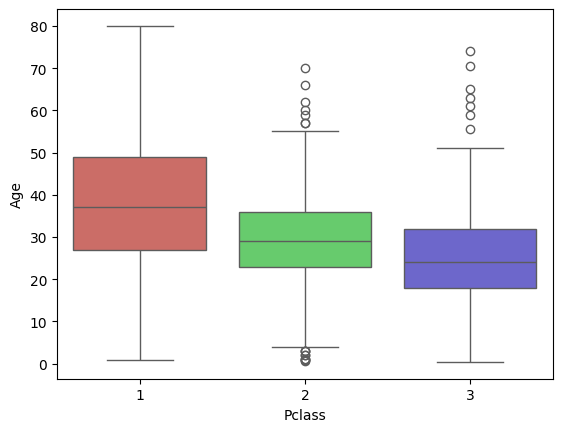

In [30]:
sb.boxplot(titanic_data,x='Pclass',y='Age',palette='hls')

C:\Users\jainp\AppData\Local\Temp\ipykernel_18368\4131093942.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=titanic_data,x='Survived',palette='hls')


<Axes: xlabel='Survived', ylabel='count'>

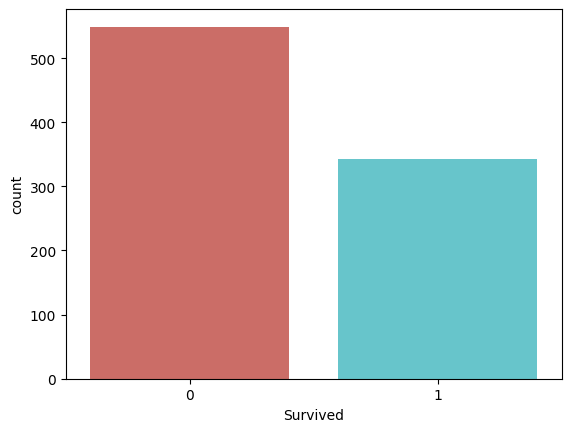

In [36]:
sb.countplot(data=titanic_data,x='Survived',palette='hls')

In [38]:
titanic_data.dropna(inplace=True)

In [39]:
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [41]:
titanic_data['Sex']=titanic_data['Sex'].astype("category")
titanic_data['Sex']=titanic_data['Sex'].cat.codes

In [42]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [44]:
titanic_data=titanic_data.drop(columns=['Pclass','Fare','Embarked'],axis=1)
titanic_data.head()

,Survived,Sex,Age,SibSp,Parch
0,0,1,22.0,1,0
1,1,0,38.0,1,0
2,1,0,26.0,0,0
3,1,0,35.0,1,0
4,0,1,35.0,0,0


<Axes: >

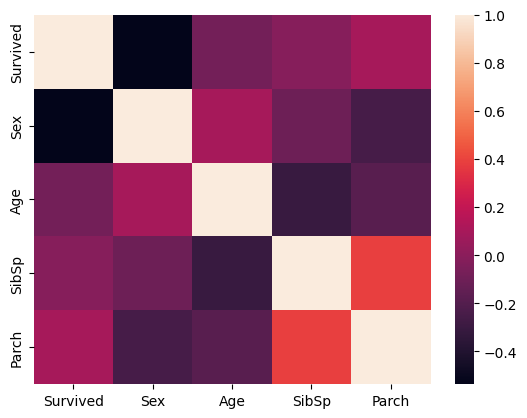

In [45]:
sb.heatmap(titanic_data.corr())

In [51]:
x=titanic_data.iloc[:,1:5].values
y=titanic_data.iloc[:,0:1].values

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=25)

In [53]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\jainp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [55]:
y_pred=lr.predict(x_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [56]:
confu=confusion_matrix(y_pred,y_test)
confu

array([[101,  25],
       [ 24,  64]], dtype=int64)

In [57]:
score=accuracy_score(y_pred,y_test)

In [58]:
score

0.7710280373831776